In [1]:
# Install xgboost in notebook instance 
!conda install -y -c conda-forge xgboost

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.6.14

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/python3

  added / updated specs: 
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2r             |       h14c3975_0         3.1 MB  conda-forge
    py-xgboost-0.82            |   py36he1b5a44_0          70 KB  conda-forge
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    xgboost-0.82               |   py36he1b5a44_0           9 KB  conda-forge
    libxgboost-0.82            |       he1b5a44_0         3.9 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         7.1 MB



In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

In [3]:
# Read the taining and validation files 
df_train = pd.read_csv('bikesharing_train.csv')
df_valida = pd.read_csv('bikesharing_valida.csv')

In [4]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,4.477337,2011,9,3,5,0
1,2012-08-13 14:00:00,3,0,1,1,32.80,34.850,33,7.0015,85,163,5.517453,2012,8,13,0,14
2,2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,5.814131,2011,11,5,5,17
3,2012-08-09 19:00:00,3,0,1,1,32.80,37.880,55,12.9980,90,533,6.436150,2012,8,9,3,19
4,2011-04-14 06:00:00,2,0,1,1,13.94,17.425,76,7.0015,4,66,4.262680,2011,4,14,3,6


In [5]:
df_valida.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-09-03 00:00:00,3,0,0,2,26.24,30.305,73,7.0015,22,65,4.477337,2011,9,3,5,0
1,2012-08-13 14:00:00,3,0,1,1,32.80,34.850,33,7.0015,85,163,5.517453,2012,8,13,0,14
2,2011-11-05 17:00:00,4,0,0,1,15.58,19.695,40,11.0014,100,234,5.814131,2011,11,5,5,17
3,2012-08-09 19:00:00,3,0,1,1,32.80,37.880,55,12.9980,90,533,6.436150,2012,8,9,3,19
4,2011-04-14 06:00:00,2,0,1,1,13.94,17.425,76,7.0015,4,66,4.262680,2011,4,14,3,6


In [6]:
# Now lets eparate the independent and depedent variables
columns = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
          'humidity', 'windspeed', 'year', 'month', 'day', 'dayofweek', 'hour']
x_train = df_train[columns] # Input features
y_train = df_train['count'].ravel() # Traget column 

In [7]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,3,0,0,2,26.24,30.305,73,7.0015,2011,9,3,5,0
1,3,0,1,1,32.80,34.850,33,7.0015,2012,8,13,0,14
2,4,0,0,1,15.58,19.695,40,11.0014,2011,11,5,5,17
3,3,0,1,1,32.80,37.880,55,12.9980,2012,8,9,3,19
4,2,0,1,1,13.94,17.425,76,7.0015,2011,4,14,3,6


In [8]:
# Similarly for validation dataset
x_valida = df_valida[columns]
y_valida = df_valida['count'].ravel()

In [9]:
#XGBoost Training parameter reference:
regressor = xgb.XGBRegressor(max_depth=5, eta=0.1, subsample=0.7, num_rounds=150)

In [10]:
regressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_rounds=150, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [11]:
regressor.fit(x_train, y_train, eval_set=[(x_train, y_train), (x_valida, y_valida)])

[0]	validation_0-rmse:3.90451	validation_1-rmse:3.88163
[1]	validation_0-rmse:3.52514	validation_1-rmse:3.50468
[2]	validation_0-rmse:3.18459	validation_1-rmse:3.16662
[3]	validation_0-rmse:2.87826	validation_1-rmse:2.86122
[4]	validation_0-rmse:2.60242	validation_1-rmse:2.58635
[5]	validation_0-rmse:2.35546	validation_1-rmse:2.34057
[6]	validation_0-rmse:2.13469	validation_1-rmse:2.12086
[7]	validation_0-rmse:1.93541	validation_1-rmse:1.92276
[8]	validation_0-rmse:1.75647	validation_1-rmse:1.74521
[9]	validation_0-rmse:1.59662	validation_1-rmse:1.58607
[10]	validation_0-rmse:1.45313	validation_1-rmse:1.4437
[11]	validation_0-rmse:1.32606	validation_1-rmse:1.31763
[12]	validation_0-rmse:1.2107	validation_1-rmse:1.20356
[13]	validation_0-rmse:1.1052	validation_1-rmse:1.09849
[14]	validation_0-rmse:1.01324	validation_1-rmse:1.0073
[15]	validation_0-rmse:0.927715	validation_1-rmse:0.92256
[16]	validation_0-rmse:0.854276	validation_1-rmse:0.849833
[17]	validation_0-rmse:0.7887	validation_1

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, eta=0.1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, num_rounds=150, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [12]:
eval_results = regressor.evals_result()

In [13]:
training_rounds = range(len(eval_results['validation_0']['rmse']))

In [14]:
training_rounds

range(0, 100)

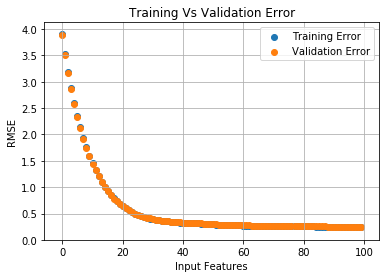

In [16]:
# Plot the eavluation results to understand the error margin for training and validation datasets

plt.scatter(x=training_rounds, y=eval_results['validation_0']['rmse'], label='Training Error')
plt.scatter(x=training_rounds, y=eval_results['validation_1']['rmse'], label='Validation Error')
plt.grid(True)
plt.xlabel('Input Features')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()

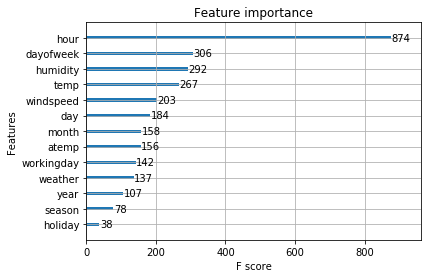

In [17]:
xgb.plot_importance(regressor)

In [18]:
# Read the complete dataset and predict the count for the entire dataset.
df = pd.read_csv('bikesharing_all_data.csv')

In [19]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4


In [20]:
X_test = df[columns]

In [21]:
results = regressor.predict(X_test)

In [22]:
results[:5]

array([3.1718059, 3.206772 , 2.9364595, 1.934494 , 1.0758984],
      dtype=float32)

In [23]:
df['count_pred'] = results

In [24]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,count_pred
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,5,0,3.171806
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,5,1,3.206772
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,5,2,2.936460
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,5,3,1.934494
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,5,4,1.075898


In [25]:
df['count_pred'].describe()

count    10886.000000
mean         4.588523
std          1.381828
min          0.516918
25%          3.751918
50%          4.995625
75%          5.631862
max          6.741621
Name: count_pred, dtype: float64

In [26]:
# From the description we know that there are some negative values which in this context do not signify anything.
df[df['count_pred'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,count_pred


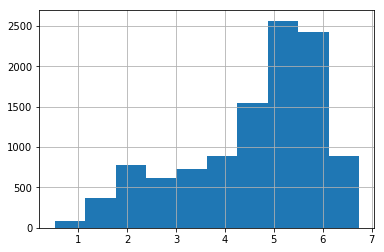

In [27]:
df['count_pred'].hist()

In [102]:
# The negative values need to be replaced by zero. 
def adjust_count(x):
    if x < 0:
        return 0
    else:
        return x

In [103]:
df['count_pred'] = df['count_pred'].map(adjust_count)

In [104]:
df[df['count_pred'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,hour,count_pred


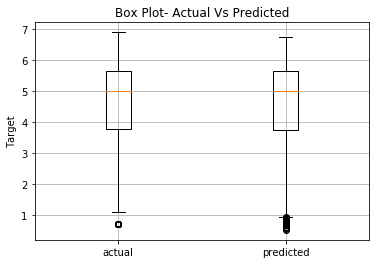

In [28]:
# Create a box plot of Actual vs Predicted values to understand the outliers

plt.boxplot([df['count'], df['count_pred']], labels=['actual', 'predicted'])
plt.title('Box Plot- Actual Vs Predicted')
plt.ylabel('Target')
plt.grid(True)
# The graph indicates there are a lot of outliers. 

In [29]:
# lets check if the model is over predicting or under predicting
# Training data residuals

residual = (df['count_pred'] - df['count'])

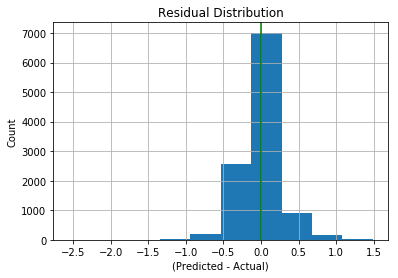

In [30]:
plt.hist(residual)
plt.grid(True)
plt.xlabel('(Predicted - Actual)')
plt.ylabel('Count')
plt.title('Residual Distribution')
plt.axvline(color='g')

# Over Prediction and Under Prediction needs to be balanced and in this case it does look balanced. 

In [31]:
# Lets comput the metric and submit it to kaggle 
import sklearn.metrics as metrics
print("RMSE: {0}". format(metrics.mean_squared_error(df['count'].map(np.expm1), df['count_pred'].map(np.expm1))**.5))

RMSE: 40.669880407191435


In [32]:
# Metric used by Kaggle RMSLE
def compute_rmsle(y_true, y_pred):
    if type(y_true) != np.ndarray:
        y_true = np.array(y_true)
        
    if type(y_pred) != np.ndarray:
        y_pred = np.array(y_pred)
    
    return (np.average((np.log1p(y_pred) - np.log1p(y_true))**2)**.5)

In [34]:
print("RMSLE: {0}". format(compute_rmsle(df['count'].map(np.expm1), df['count_pred'].map(np.expm1))))

RMSLE: 0.258928947146273


In [35]:
# Prepare data for submission to Kaggle 

df_test = pd.read_csv('test_data.csv', parse_dates=['datetime'])

In [36]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [37]:
# Lets predict the count for the test data
# to dothis we need to remove the datetime column from the test data set. 

x_test = df_test.iloc[:, 1:] # Exclude datetime for prediction 

In [38]:
x_test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4


In [39]:
test_results = regressor.predict(x_test)

In [40]:
test_results[:5]

array([2.2819805, 1.7426068, 1.4775771, 1.114629 , 1.0954915],
      dtype=float32)

In [41]:
df_test['count'] = test_results

In [42]:
df_test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,3,0,2.281981
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,1,1.742607
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,3,2,1.477577
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3,1.114629
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,4,1.095492


In [43]:
# Check for negative values and replace the negative values with 0
df_test[df_test['count'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [44]:
df_test['count'] = df_test['count'].map(np.expm1)

In [45]:
df_test[df_test['count'] < 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count


In [47]:
# Create a csv file with datetime and count columns to be submitted to Kaggle 
df_test[['datetime', 'count']].to_csv('predicted_count_testfile3.csv', index=False)